# Preprocessing

In [79]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [80]:
from google.colab import drive
import h5py

drive.mount('/content/drive2')

Mounted at /content/drive2


In [81]:
# Optimization 1 
# Drop the non-beneficial ID columns, 'EIN', 'NAME', 'STATUS', 'SPECIAL_CONSIDERATIONS'.
application_df = application_df.drop(columns=['EIN', 'NAME', 'STATUS', 'SPECIAL_CONSIDERATIONS'])

application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1
...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,0,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,0,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,0,5000,0
34297,T5,Independent,C3000,ProductDev,Association,0,5000,1


In [82]:
# Determine the number of unique values in each column.
application_df.nunique(axis=0)

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [83]:
# Look at APPLICATION_TYPE value counts for binning
application_count = application_df['APPLICATION_TYPE'].value_counts()
application_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [84]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_count[application_count < 1000].index)

 # Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# # Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [85]:
# Look at CLASSIFICATION value counts for binning
classification_count = application_df['CLASSIFICATION'].value_counts()
classification_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [86]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_count[classification_count > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [87]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_count[classification_count < 2000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: CLASSIFICATION, dtype: int64

In [88]:
# Convert categorical data to numeric with `pd.get_dummies`
numbers_appllcation_df = pd.get_dummies(application_df)

numbers_appllcation_df.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,108590,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,5000,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,6692,1,0,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
4,142590,1,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [89]:
# Split our preprocessed data into our features and target arrays
X = numbers_appllcation_df.drop(["IS_SUCCESSFUL"],1).values
y = numbers_appllcation_df["IS_SUCCESSFUL"].values


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

<ipython-input-89-8228f3ec2224>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = numbers_appllcation_df.drop(["IS_SUCCESSFUL"],1).values


In [90]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Compile, Train and Evaluate the Model

In [91]:
# Define model
nn = tf.keras.models.Sequential()

In [92]:
# In the first example I will add layers to the model

# First hidden layer
nn.add(tf.keras.layers.Dense(units=160, activation="relu", input_dim=35))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=60, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=40, activation="softmax"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=20, activation="softmax"))
# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 160)               5760      
                                                                 
 dense_16 (Dense)            (None, 60)                9660      
                                                                 
 dense_17 (Dense)            (None, 40)                2440      
                                                                 
 dense_18 (Dense)            (None, 20)                820       
                                                                 
 dense_19 (Dense)            (None, 1)                 21        
                                                                 
Total params: 18,701
Trainable params: 18,701
Non-trainable params: 0
_________________________________________________________________


In [93]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [94]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50)

Epoch 1/50
804/804 [==============================] - 4s 3ms/step - loss: 0.6568 - accuracy: 0.6869
Epoch 2/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5931 - accuracy: 0.7243
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5778 - accuracy: 0.7264
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5691 - accuracy: 0.7284
Epoch 5/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5668 - accuracy: 0.7296
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5651 - accuracy: 0.7292
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5638 - accuracy: 0.7276
Epoch 8/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5631 - accuracy: 0.7290
Epoch 9/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5607 - accuracy: 0.7310
Epoch 10/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5606 - accuracy: 0.7299

In [95]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5652 - accuracy: 0.7252 - 713ms/epoch - 3ms/step
Loss: 0.5651735067367554, Accuracy: 0.7252478003501892


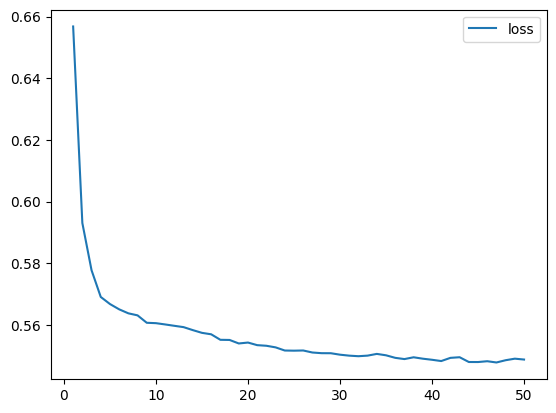

In [96]:


history_df = pd.DataFrame(fit_model.history)
history_df.index += 1
history_df.plot(y="loss")
plt.show()

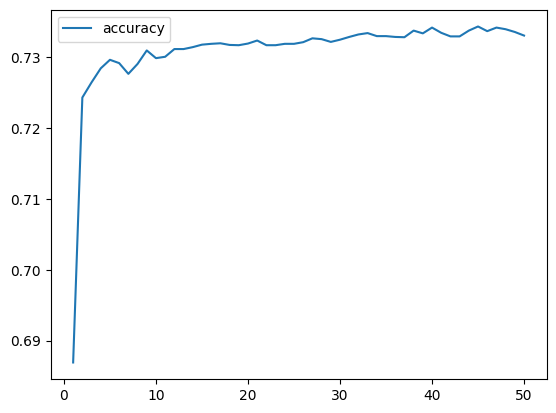

In [97]:
# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [101]:
# Export file
file_export = "/content/drive2/MyDrive/AlphabetSoupCharity_Opt01.h5"


nn.save(file_export)

In [102]:
# Optimization 2 
# Reload and make sure we are starting fresh
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [103]:
# Drop the non-beneficial ID columns, 'EIN', 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [104]:
# Determine the number of unique values in each column.
application_df.nunique(axis=0)

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [105]:
# Look at APPLICATION_TYPE value counts for binning
application_count = application_df['APPLICATION_TYPE'].value_counts()
application_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [106]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_count[application_count < 500].index)

 # Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# # Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [107]:
# Look at CLASSIFICATION value counts for binning
classification_count = application_df['CLASSIFICATION'].value_counts()
classification_count[classification_count > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [108]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_count[classification_count < 1000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [109]:
# Find one more bin 
# Let's try actually dumping the default 5000 loan ask and see if we can gain insights.
application_df = application_df[application_df['ASK_AMT'] != 5000]
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
6,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1
7,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1
...,...,...,...,...,...,...,...,...,...,...
34281,T3,Independent,C1000,Preservation,Trust,1,1M-5M,N,56261,1
34284,T3,CompanySponsored,C1000,Preservation,Association,1,1M-5M,N,3384856,0
34287,T3,Independent,C1200,Preservation,Trust,1,25000-99999,N,6713,1
34289,T3,Independent,C1000,Preservation,Trust,1,25000-99999,N,20197,1


In [110]:
# Convert categorical data to numeric with `pd.get_dummies`
numbers_appllcation_df = pd.get_dummies(application_df)

numbers_appllcation_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,1,31452,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
7,1,7508025,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [111]:
# Split our preprocessed data into our features and target arrays
X = numbers_appllcation_df.drop(["IS_SUCCESSFUL"],1).values
y = numbers_appllcation_df["IS_SUCCESSFUL"].values


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

<ipython-input-111-8a755caa9190>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = numbers_appllcation_df.drop(["IS_SUCCESSFUL"],1).values


In [112]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [113]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(80, activation="relu", input_dim=43))

# Second hidden layer
nn.add(tf.keras.layers.Dense(30, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 80)                3520      
                                                                 
 dense_21 (Dense)            (None, 30)                2430      
                                                                 
 dense_22 (Dense)            (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [114]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [115]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)
# nn.summary()

Epoch 1/100
209/209 [==============================] - 1s 2ms/step - loss: 0.6359 - accuracy: 0.6613
Epoch 2/100
209/209 [==============================] - 0s 2ms/step - loss: 0.6075 - accuracy: 0.6797
Epoch 3/100
209/209 [==============================] - 0s 2ms/step - loss: 0.6024 - accuracy: 0.6830
Epoch 4/100
209/209 [==============================] - 0s 2ms/step - loss: 0.5988 - accuracy: 0.6845
Epoch 5/100
209/209 [==============================] - 0s 2ms/step - loss: 0.5976 - accuracy: 0.6878
Epoch 6/100
209/209 [==============================] - 0s 2ms/step - loss: 0.5957 - accuracy: 0.6854
Epoch 7/100
209/209 [==============================] - 0s 2ms/step - loss: 0.5928 - accuracy: 0.6878
Epoch 8/100
209/209 [==============================] - 0s 2ms/step - loss: 0.5930 - accuracy: 0.6870
Epoch 9/100
209/209 [==============================] - 0s 2ms/step - loss: 0.5909 - accuracy: 0.6929
Epoch 10/100
209/209 [==============================] - 0s 2ms/step - loss: 0.5907 - accura

In [116]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

70/70 - 1s - loss: 0.6196 - accuracy: 0.6860 - 652ms/epoch - 9ms/step
Loss: 0.61957848072052, Accuracy: 0.6859838366508484


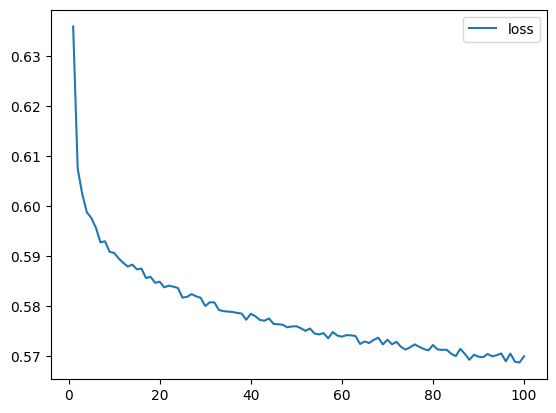

In [117]:
history_df = pd.DataFrame(fit_model.history)
history_df.index += 1
history_df.plot(y="loss")
plt.show()

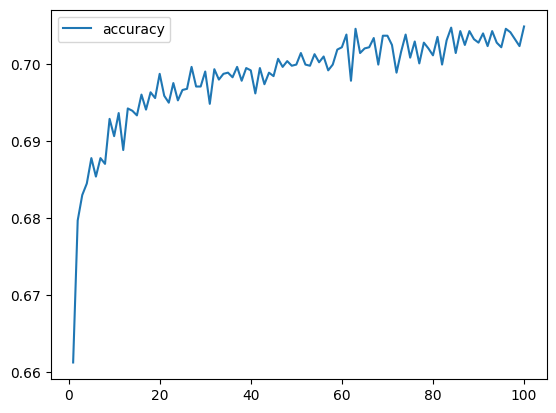

In [118]:
# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [120]:
# Export file

file_export = "/content/drive2/MyDrive/AlphabetSoupCharity_Opt02.h5"

nn.save(file_export)

In [121]:
# Optimization 3 
# Reload and make sure we are starting fresh
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [122]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])

application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [123]:
# Determine the number of unique values in each column.
application_df.nunique(axis=0)

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [124]:
# Look at APPLICATION_TYPE value counts for binning
application_count = application_df['APPLICATION_TYPE'].value_counts()
application_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [125]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_count[application_count < 15].index)

 # Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# # Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
T13         66
T12         27
T2          16
Other       11
Name: APPLICATION_TYPE, dtype: int64

In [126]:
# Look at CLASSIFICATION value counts for binning
classification_count = application_df['CLASSIFICATION'].value_counts()
classification_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [127]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_count[classification_count > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [128]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_count[classification_count < 100].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [129]:
# Convert categorical data to numeric with `pd.get_dummies`
numbers_appllcation_df = pd.get_dummies(application_df)

numbers_appllcation_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T3,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [130]:
# Split our preprocessed data into our features and target arrays
X = numbers_appllcation_df.drop(["IS_SUCCESSFUL"],1).values
y = numbers_appllcation_df["IS_SUCCESSFUL"].values


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

<ipython-input-130-8228f3ec2224>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = numbers_appllcation_df.drop(["IS_SUCCESSFUL"],1).values


In [131]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Compile, Train and Evaluate the Model

In [132]:
# Define model
nn = tf.keras.models.Sequential()

In [133]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(80, activation="relu", input_dim=53))

# Second hidden layer
nn.add(tf.keras.layers.Dense(30, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 80)                4320      
                                                                 
 dense_24 (Dense)            (None, 30)                2430      
                                                                 
 dense_25 (Dense)            (None, 1)                 31        
                                                                 
Total params: 6,781
Trainable params: 6,781
Non-trainable params: 0
_________________________________________________________________


In [134]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [135]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)
# nn.summary()

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.5703 - accuracy: 0.7212
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5538 - accuracy: 0.7303
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5513 - accuracy: 0.7289
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5494 - accuracy: 0.7307
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5482 - accuracy: 0.7310
Epoch 6/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5472 - accuracy: 0.7317
Epoch 7/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5464 - accuracy: 0.7310
Epoch 8/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5458 - accuracy: 0.7318
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5452 - accuracy: 0.7312
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5441 - accura

In [136]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5572 - accuracy: 0.7307 - 445ms/epoch - 2ms/step
Loss: 0.5572026371955872, Accuracy: 0.7307288646697998


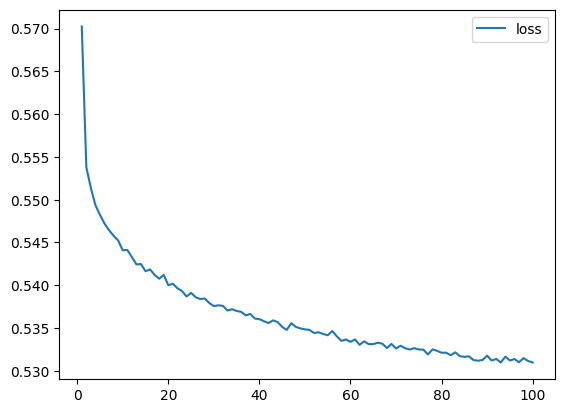

In [137]:
history_df = pd.DataFrame(fit_model.history)
history_df.index += 1
history_df.plot(y="loss")
plt.show()

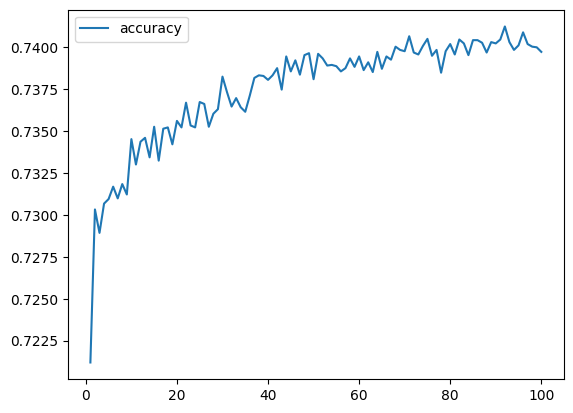

In [138]:
# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [140]:
# Export our model to HDF5 file


file_export = "/content/drive2/MyDrive/AlphabetSoupCharity_Opt03.h5"


nn.save(file_export)

In [141]:
#  Optimization 4 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [142]:
# Column names
application_df.columns

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [143]:
application_df = application_df.drop(columns=['EIN','NAME'])

application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [144]:
application_df.nunique(axis=0)

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [145]:
application_count = application_df['APPLICATION_TYPE'].value_counts()
application_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [146]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_count[application_count < 15].index)

 # Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# # Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
T13         66
T12         27
T2          16
Other       11
Name: APPLICATION_TYPE, dtype: int64

In [147]:
# Look at CLASSIFICATION value counts for binning
classification_count = application_df['CLASSIFICATION'].value_counts()
classification_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [148]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_count[classification_count > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [149]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_count[classification_count < 100].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [150]:
# Convert categorical data to numeric with `pd.get_dummies`
numbers_appllcation_df = pd.get_dummies(application_df)

numbers_appllcation_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T3,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [151]:
# Split our preprocessed data into our features and target arrays
X = numbers_appllcation_df.drop(["IS_SUCCESSFUL"],1).values
y = numbers_appllcation_df["IS_SUCCESSFUL"].values


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

<ipython-input-151-8a755caa9190>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = numbers_appllcation_df.drop(["IS_SUCCESSFUL"],1).values


In [152]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [153]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(13, activation="relu", input_dim=53))

# Second hidden layer
nn.add(tf.keras.layers.Dense(21, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(34,activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 13)                702       
                                                                 
 dense_27 (Dense)            (None, 21)                294       
                                                                 
 dense_28 (Dense)            (None, 34)                748       
                                                                 
 dense_29 (Dense)            (None, 1)                 35        
                                                                 
Total params: 1,779
Trainable params: 1,779
Non-trainable params: 0
_________________________________________________________________


In [154]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [155]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)
# nn.summary()

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.5905 - accuracy: 0.7041
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5590 - accuracy: 0.7248
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5549 - accuracy: 0.7273
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5521 - accuracy: 0.7281
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5503 - accuracy: 0.7282
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5491 - accuracy: 0.7292
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5481 - accuracy: 0.7308
Epoch 8/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5472 - accuracy: 0.7313
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5468 - accuracy: 0.7304
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5457 - accura

In [156]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5537 - accuracy: 0.7298 - 454ms/epoch - 2ms/step
Loss: 0.5536705851554871, Accuracy: 0.7297959327697754


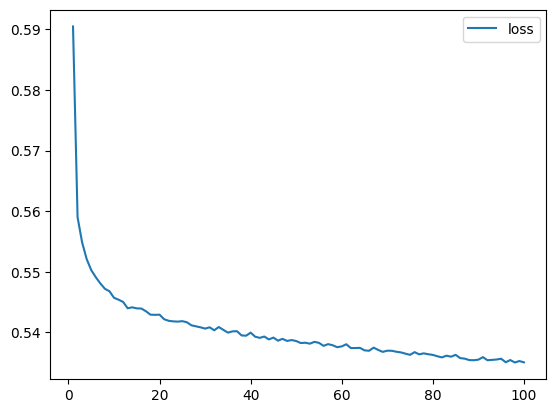

In [157]:
history_df = pd.DataFrame(fit_model.history)
history_df.index += 1
history_df.plot(y="loss")
plt.show()

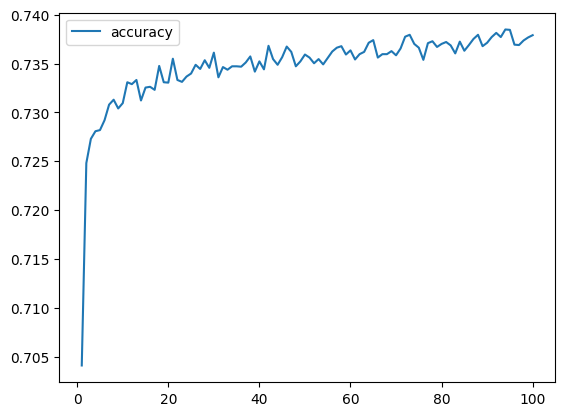

In [158]:
# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [161]:
# Export our model to HDF5 file
file_export = "/content/drive2/MyDrive/AlphabetSoupCharity_Opt04.h5"

# with h5py.File(file_export, 'w') as file:
nn.save(file_export)